## Setup

In [12]:
import warnings
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from typing import List, Tuple
from tensorflow import keras
from tensorflow.keras import layers

warnings.simplefilter("ignore")
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
(ds_train, ds_test), ds_info = tfds.load(
    name="cifar10",
    split=["train", "test"],
    as_supervised=True,
    with_info=True,
)

In [11]:
print(ds_info.description)
print(ds_info.features)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})


In [13]:
def implot(
    imgs: List[np.array],
    names: list = None,
    cols: int = None,
    figsize: Tuple[int, int] = None,
    show_val: bool = False,
    font_size: int = 4,
    **kw,
) -> None:
    imgs = [imgs] if not isinstance(imgs, list) else imgs
    cols = 1 if cols is None else cols
    rows = int(np.ceil(len(imgs) / cols))

    if figsize is None:
        figsize = (cols * 3, rows * 3)
    plt.figure(figsize=figsize)

    if names is None:
        names = ["" for _ in range(len(imgs))]

    for i, (arr, name) in enumerate(zip(imgs, names)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(arr, **kw)
        plt.axis("off")
        plt.title(name)

        if show_val:
            for y in range(arr.shape[0]):
                for x in range(arr.shape[1]):
                    plt.text(
                        x,
                        y,
                        f"{arr[y, x]:1.1f}",
                        color="red",
                        ha="center",
                        va="center",
                        fontsize=font_size,
                    )

    plt.show()


def plot(
    images: tf.Tensor | np.ndarray,
    labels: tf.Tensor | np.ndarray = None,
    ncols: int = 1,
    figsize: Tuple[int, int] = (10, 10),
    names: List[str] = None,
    float_: bool = False,
    **kw,
) -> None:
    assert (
        labels is not None or names is not None
    ), "Either labels or names must be provided"

    n = images.shape[0]
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=figsize)

    if isinstance(images, tf.Tensor):
        images = images.numpy()

    if not float_:
        images = images.astype("uint8")

    for i in range(n):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], **kw)
        plt.title(class_names[labels[i]] if names is None else names[i])
        plt.axis("off")

2023-11-01 15:06:18.165181: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


TypeError: Invalid shape (9, 32, 32, 3) for image data

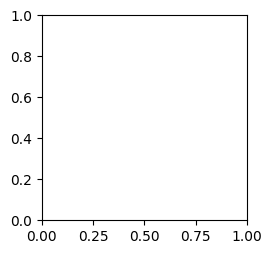

In [22]:
x, y = ds_train.batch(9).take(1).__iter__().__next__()
implot(x, y, cols=3)

TypeError: Image data of dtype object cannot be converted to float

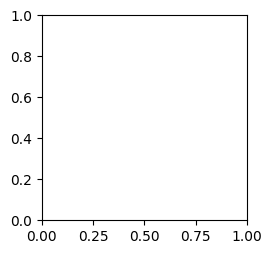

In [14]:
implot(ds_train.batch(9).take(1), cols=3)